<h1>MCS 7224: COMPUTER VISION </h1>

 <h3>TRAFFIC MONITORING TOOL USING COMPUTER VISION AND MACHINE LEARNING </h3>

#### Name: NAKACWA SANDRA  
Reg No. : 2023/HD05/04702U  
Std No. : 2300704702



#### Versions  

1. cv2.................4.9.0

In [115]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt



Done extracting frames.


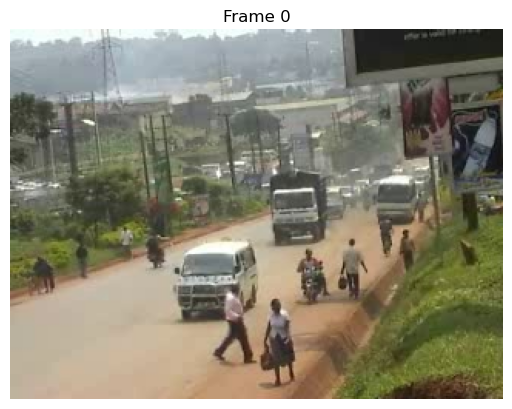

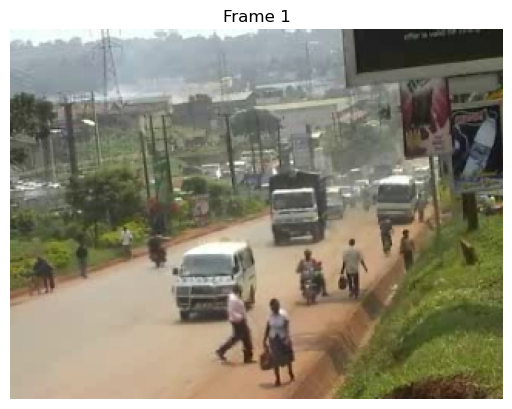

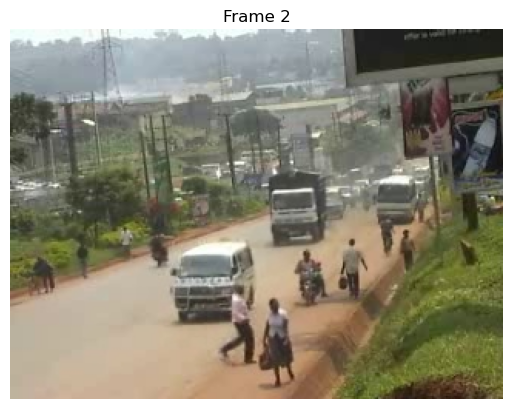

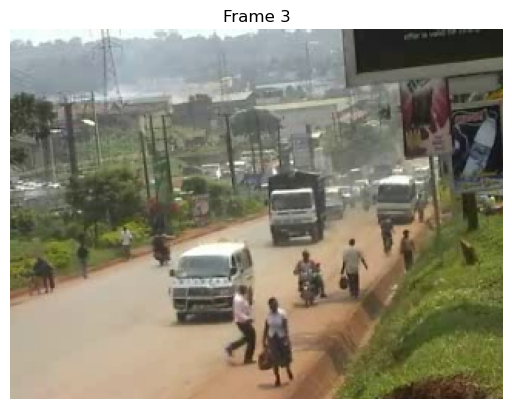

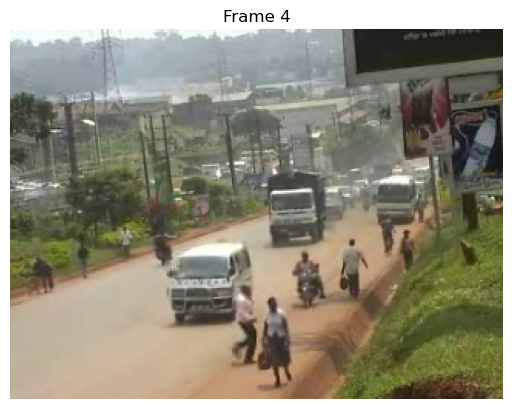

In [117]:
import cv2
import os

# Define the path to the video file
video_path = 'nakawa_output.avi'

# A directory to save the extracted frames
frames_dir = 'extracted_frames'
os.makedirs(frames_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    frame_count = 0
    while True:
        # Read one frame at a time
        ret, frame = cap.read()
        
        # If the frame was not read successfully, break the loop
        if not ret:
            break
        
        # Save the frame as an image file
        frame_filename = os.path.join(frames_dir, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)
        
        # Print the saved frame filename
       # print(f'Saved: {frame_filename}')
        
        # Increment the frame count
        frame_count += 1

    # Release the video capture object
    cap.release()
    print("Done extracting frames.")

# Display a few frames using matplotlib 
import matplotlib.pyplot as plt

# Display the first 5 frames
for i in range(5):
    frame_filename = os.path.join(frames_dir, f'frame_{i:04d}.jpg')
    img = cv2.imread(frame_filename)
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame {i}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Error: Could not read frame {i}")


In [7]:
#number of extracted frames
import os

# Define the directory containing extracted frames
frames_dir = 'extracted_frames'

# Count the number of files (frames) in the directory
num_frames = len([name for name in os.listdir(frames_dir) if os.path.isfile(os.path.join(frames_dir, name))])

# Print the number of extracted frames
print(f"Number of extracted frames: {num_frames}")


Number of extracted frames: 74822


<h2>Data Preprocessing</h2>  
After annotating

<h3>Data Augumentation</h3>

**Rotation:** Rotate the images by a certain angle to introduce variations in perspective.

In [17]:
import cv2
import os

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Define the folder containing the images
folder_path = "standardized_frames"

# Define the angle by which to rotate the images
angle = 30

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is not None:
        # Rotate the image
        rotated_image = rotate_image(image, angle)

        # Save the rotated image (optional)
        rotated_image_path = os.path.join(folder_path, f"rotated_{filename}")
        cv2.imwrite(rotated_image_path, rotated_image)

        print(f"Image {filename} rotated and saved as {rotated_image_path}")
    else:
        print(f"Error: Unable to load image {filename}")


**Flipping:** Flip the images horizontally or vertically to simulate different viewpoints.

In [18]:
import cv2
import os

def flip_image(image, flip_code):
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

# Define the folder containing the images
folder_path = "standardized_frames"

# Define the flip code
flip_code = 1  # 0 for horizontal flip, 1 for vertical flip

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is not None:
        # Flip the image
        flipped_image = flip_image(image, flip_code)

        # Save the flipped image (optional)
        flipped_image_path = os.path.join(folder_path, f"flipped_{filename}")
        cv2.imwrite(flipped_image_path, flipped_image)

        print(f"Image {filename} flipped and saved as {flipped_image_path}")
    else:
        print(f"Error: Unable to load image {filename}")


**Brightness adjustment:** Adjust the brightness of the images by changing pixel values.

In [19]:
import cv2
import os

def adjust_brightness(image, brightness_factor):
    adjusted_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
    return adjusted_image

# Define the folder containing the images
folder_path = "standardized_frames"

# Define the brightness factor
brightness_factor = 1.5  # Increase brightness by 50%

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is not None:
        # Adjust the brightness of the image
        brightened_image = adjust_brightness(image, brightness_factor)

        # Save the adjusted image (optional)
        brightened_image_path = os.path.join(folder_path, f"brightened_{filename}")
        cv2.imwrite(brightened_image_path, brightened_image)

        print(f"Image {filename} brightness adjusted and saved as {brightened_image_path}")
    else:
        print(f"Error: Unable to load image {filename}")


<h2>Exploratory Data Analysis</h2>

In [11]:
def load_annotations(annotation_file):
    annotations = {}
    with open(annotation_file, 'r') as f:
        for line in f:
            print("Line:", line)  # Print the line to inspect its contents
            parts = line.strip().split()
            print("Parts:", parts)  # Print the parts after splitting
            if len(parts) != 2:
                print("Error: Line does not contain two parts:", line)
                continue
            filename, class_id = parts
            annotations[filename] = int(class_id)
    return annotations


In [32]:
import os

# Path to the folder containing frame files
main_folder = "ImageSets/Main"

# Dictionary to store frame counts
frame_distribution = {}

# Iterate over each file in the folder
for filename in os.listdir(main_folder):
    # Check if the file is a text file
    if filename.endswith(".txt"):
        # Open the file
        with open(os.path.join(main_folder, filename), "r") as file:
            # Read the lines
            lines = file.readlines()
            # Count the number of frames
            frame_count = len(lines)
            # Store the count in the dictionary
            frame_distribution[filename] = frame_count

# Print the frame distribution
for filename, count in frame_distribution.items():
    print(f"File: {filename}, Frame Count: {count}")


File: default.txt, Frame Count: 1248


In [34]:
import os
import xml.etree.ElementTree as ET

# Path to Annotations folder
annotations_folder = "Annotations"

# Path to labelmap.txt
labelmap_path = "labelmap.txt"

# Dictionary to store class labels and their counts
class_distribution = {}

# Load label map
with open(labelmap_path, "r") as f:
    label_map = {line.split(":")[0]: line.split(":")[0] for line in f.readlines() if line.strip()}

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Iterate over each object in the XML file
        for obj in root.findall("object"):
            # Extract class label
            class_label = obj.find("name").text
            
            # Map class label to class name
            class_name = label_map.get(class_label, class_label)
            
            # Increment count for the class label
            class_distribution[class_name] = class_distribution.get(class_name, 0) + 1

# Print class distribution
print("Frame Distribution per Class:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} frames")


Frame Distribution per Class:
Motorcycle: 2891 frames
Car: 4803 frames


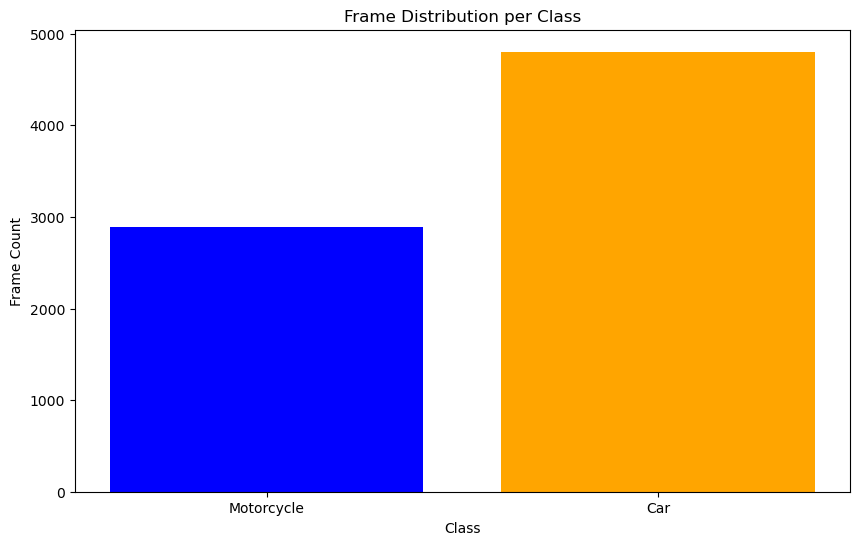

In [18]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Path to Annotations folder
annotations_folder = "Annotations"

# Path to labelmap.txt
labelmap_path = "labelmap.txt"

# Dictionary to store class labels and their counts
class_distribution = {}

# Load label map
with open(labelmap_path, "r") as f:
    label_map = {line.split(":")[0]: line.split(":")[0] for line in f.readlines() if line.strip()}

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Iterate over each object in the XML file
        for obj in root.findall("object"):
            # Extract class label
            class_label = obj.find("name").text
            
            # Map class label to class name
            class_name = label_map.get(class_label, class_label)
            
            # Increment count for the class label
            class_distribution[class_name] = class_distribution.get(class_name, 0) + 1

# Convert dictionary to lists for plotting
class_names = list(class_distribution.keys())
frame_counts = list(class_distribution.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, frame_counts, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Frame Count')
plt.title('Frame Distribution per Class')
plt.show()


In [2]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to Annotations folder
annotations_folder = "Annotations"

# Path to JPEGImages folder
jpeg_folder = "JPEGImages"

# Path to labelmap.txt
labelmap_path = "labelmap.txt"

# Load class names from labelmap.txt
def load_class_names(labelmap_path):
    class_names = {}
    with open(labelmap_path, "r") as f:
        for line in f:
            if line.strip() and not line.startswith("#"):
                parts = line.strip().split(":")
                class_name = parts[0].strip()
                class_names[class_name] = class_name
    return class_names

class_names = load_class_names(labelmap_path)

# Dictionary to store class labels and corresponding image files
class_images = {class_name: [] for class_name in class_names.keys()}

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Get the filename from the XML
        filename = root.find("filename").text
        
        # Iterate over each object in the XML file
        for obj in root.findall("object"):
            # Extract class label
            class_label = obj.find("name").text
            
            # Map class label to class name
            if class_label in class_names:
                class_images[class_label].append(filename)

# Function to display sample images from different classes
def display_sample_images(class_images, jpeg_folder, num_samples_per_class=3):
    plt.figure(figsize=(15, 10))
    for class_idx, (class_name, images) in enumerate(class_images.items()):
        sample_images = random.sample(images, min(num_samples_per_class, len(images)))
        for i, image_file in enumerate(sample_images):
            plt.subplot(len(class_images), num_samples_per_class, class_idx * num_samples_per_class + i + 1)
            img_path = os.path.join(jpeg_folder, image_file)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

# Display sample images
#display_sample_images(class_images, jpeg_folder, num_samples_per_class=3)


**Vehicle density distribution**

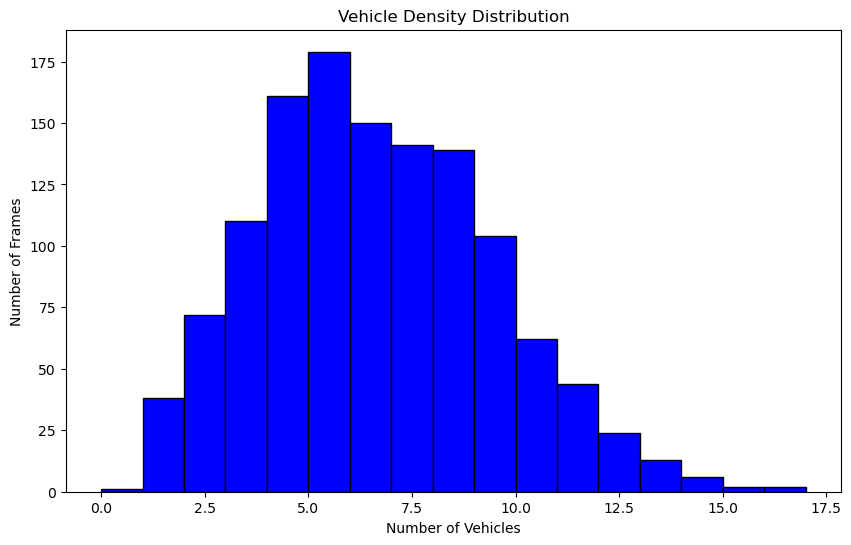

In [23]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

# Path to Annotations folder
annotations_folder = "Annotations"

# Dictionary to store vehicle counts per frame
vehicle_density = []

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Count the number of vehicles in the frame
        vehicle_count = sum(1 for obj in root.findall("object") if obj.find("name").text in ["Car", "Motorcycle"])
        vehicle_density.append(vehicle_count)

# Plot histogram of vehicle density
plt.figure(figsize=(10, 6))
plt.hist(vehicle_density, bins=range(max(vehicle_density) + 1), color='blue', edgecolor='black')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Frames')
plt.title('Vehicle Density Distribution')
plt.show()


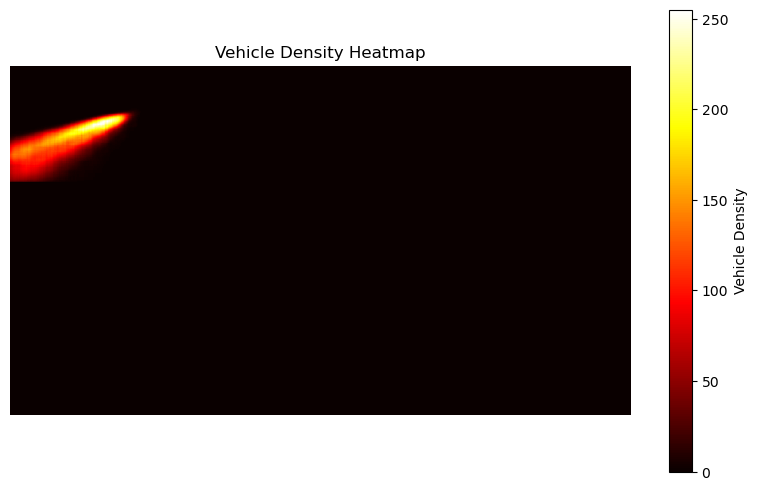

In [25]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Path to Annotations folder
annotations_folder = "Annotations"

# Initialize a blank image for the heatmap
heatmap = np.zeros((720, 1280))  # Assuming a resolution of 720p (720x1280)

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Iterate over each object in the XML file
        for obj in root.findall("object"):
            class_label = obj.find("name").text
            if class_label in ["Car", "Motorcycle"]:
                bndbox = obj.find("bndbox")
                xmin = int(float(bndbox.find("xmin").text))
                ymin = int(float(bndbox.find("ymin").text))
                xmax = int(float(bndbox.find("xmax").text))
                ymax = int(float(bndbox.find("ymax").text))
                
                # Increment the heatmap for the region
                heatmap[ymin:ymax, xmin:xmax] += 1

# Normalize the heatmap for better visualization
heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Vehicle Density')
plt.title('Vehicle Density Heatmap')
plt.axis('off')
plt.show()


**Note:** the heatmap only shows high density in the top-left position.Probably because the camera capturing the frames is fixed and focused on a specific area . Or it could just be an inconsistancy in the annotation process

<h4>Data imbalance</h4>

**Rotating the frames**

In [32]:
import os
import cv2

# Function to rotate an image
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

# Path to the folder containing images to rotate
input_folder = "JPEGImages"
# Path to the folder where rotated images will be saved
output_folder = "RotatedImages"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Specify the angle of rotation (in degrees)
angle = 45

# Iterate over each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        image = cv2.imread(os.path.join(input_folder, filename))
        # Rotate the image
        rotated_image = rotate_image(image, angle)
        # Save the rotated image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, rotated_image)

print("Rotation completed.")


Rotation completed.


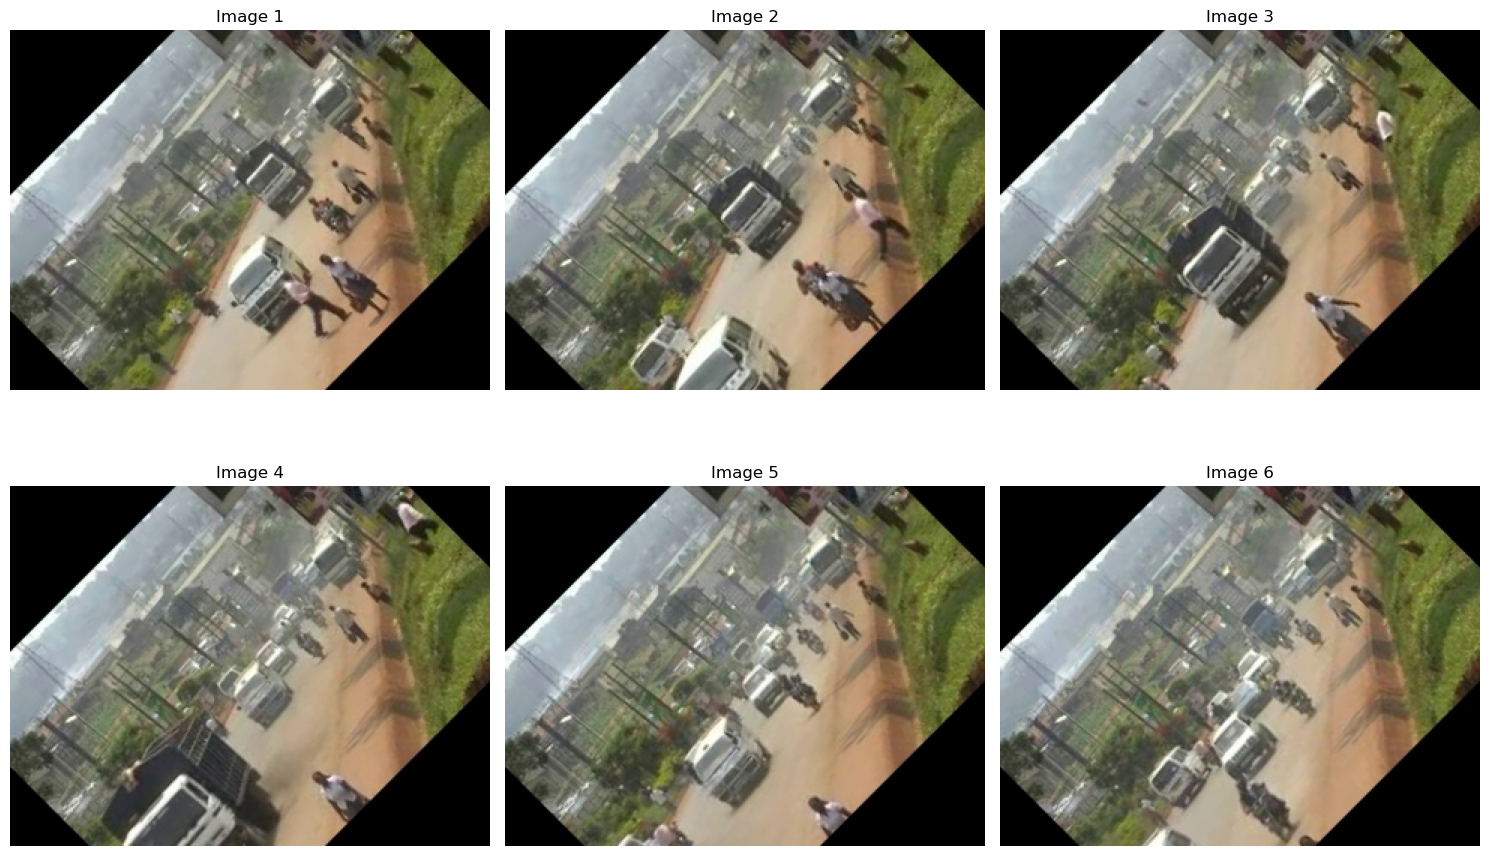

In [34]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing rotated images
rotated_folder = "RotatedImages"

# Function to load and display images
def display_images(folder, num_samples=5):
    # Get a list of filenames from the folder
    filenames = os.listdir(folder)
    # Select a random sample of filenames
    sample_filenames = filenames[:num_samples]
    
    # Create a subplot grid
    num_cols = 3
    num_rows = (num_samples + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    # Load and display each image
    for i, filename in enumerate(sample_filenames):
        # Load the image
        image = cv2.imread(os.path.join(folder, filename))
        # Convert BGR to RGB (matplotlib expects RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Plot the image
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image)
        ax.set_title(f"Image {i+1}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# Display sample rotated images
display_images(rotated_folder, num_samples=6)


<h4>Scaling</h4>

In [37]:
# Function to scale an image
def scale_image(image, scale_factor):
    # Get image dimensions
    height, width = image.shape[:2]
    # Resize the image
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
    return scaled_image

# Path to the folder containing rotated images
rotated_folder = "RotatedImages"
# Path to the folder where scaled images will be saved
scaled_folder = "ScaledImages"

# Create scaled folder if it doesn't exist
if not os.path.exists(scaled_folder):
    os.makedirs(scaled_folder)

# Specify the scale factor
scale_factor = 0.5  # Adjust as needed

# Iterate over each rotated image
for filename in os.listdir(rotated_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the rotated image
        rotated_image = cv2.imread(os.path.join(rotated_folder, filename))
        # Scale the rotated image
        scaled_image = scale_image(rotated_image, scale_factor)
        # Save the scaled image to the scaled folder
        output_path = os.path.join(scaled_folder, filename)
        cv2.imwrite(output_path, scaled_image)

print("Scaling completed.")


Scaling completed.


<h4>Brightness and Contrast Adjustment to the scaled images</h4>

In [40]:
# Function to adjust brightness and contrast of an image
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)
    
    # Adjust brightness
    l = cv2.add(l, brightness)
    
    # Adjust contrast
    if contrast > 0:
        # Increase contrast
        l = cv2.multiply(l, 1 + contrast/127)
    else:
        # Decrease contrast
        l = cv2.multiply(l, 1 / (1 - contrast/127) - 1)
    
    # Merge the LAB channels back
    adjusted_lab = cv2.merge((l, a, b))
    # Convert LAB image back to BGR color space
    adjusted_image = cv2.cvtColor(adjusted_lab, cv2.COLOR_LAB2BGR)
    
    return adjusted_image

# Path to the folder containing scaled images
scaled_folder = "ScaledImages"
# Path to the folder where adjusted images will be saved
adjusted_folder = "AdjustedImages"

# Create adjusted folder if it doesn't exist
if not os.path.exists(adjusted_folder):
    os.makedirs(adjusted_folder)

# Specify brightness and contrast adjustments
brightness = 25  
contrast = 20   

# Iterate over each scaled image
for filename in os.listdir(scaled_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the scaled image
        scaled_image = cv2.imread(os.path.join(scaled_folder, filename))
        # Adjust brightness and contrast of the scaled image
        adjusted_image = adjust_brightness_contrast(scaled_image, brightness, contrast)
        # Save the adjusted image to the adjusted folder
        output_path = os.path.join(adjusted_folder, filename)
        cv2.imwrite(output_path, adjusted_image)

print("Brightness and contrast adjustment completed.")


Brightness and contrast adjustment completed.


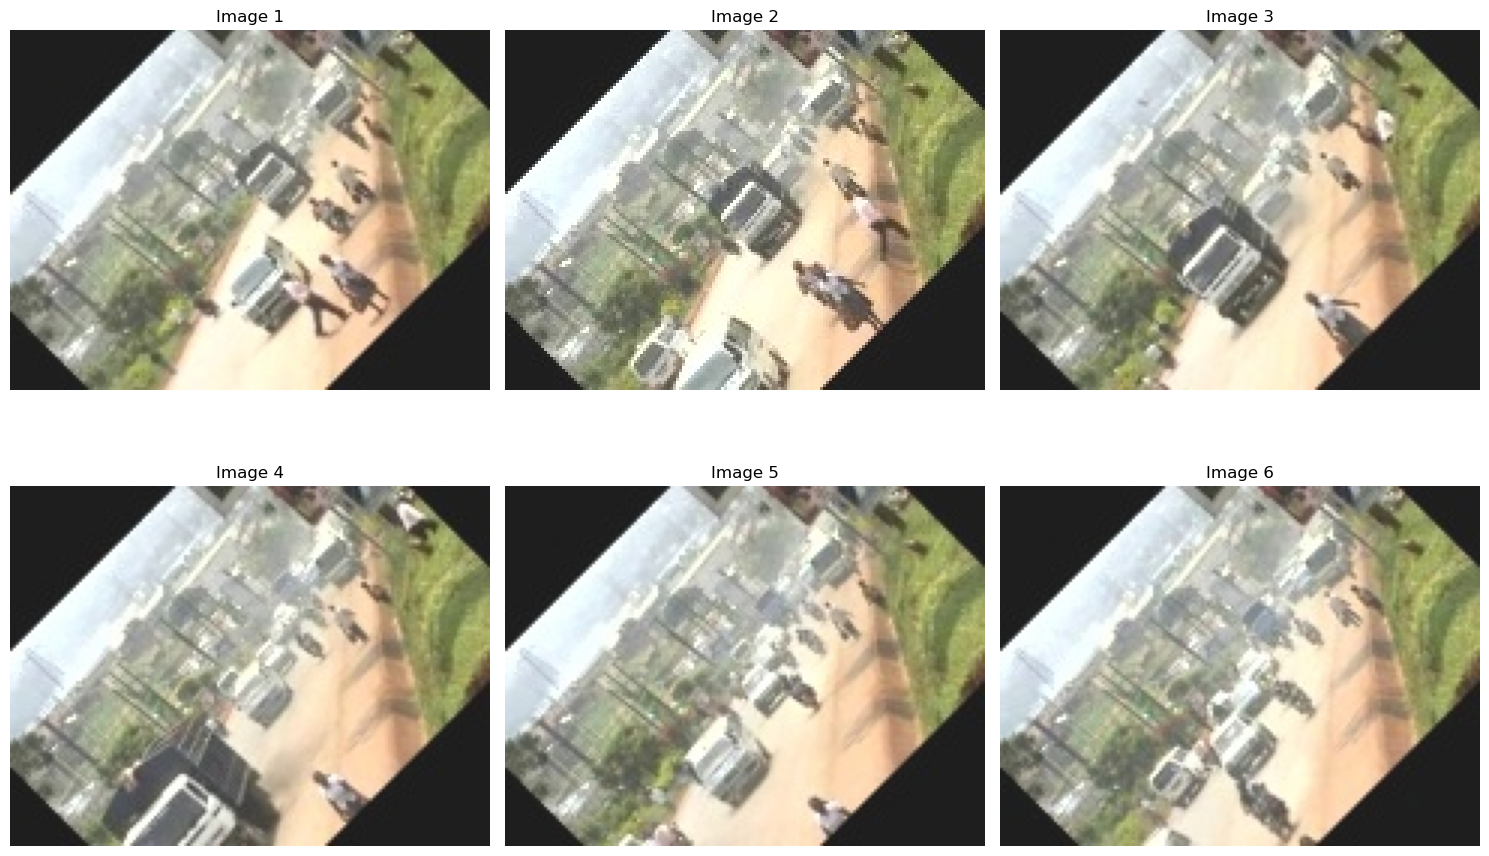

In [42]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to display images
def display_images(folder, num_samples=5):
    # Get a list of filenames from the folder
    filenames = os.listdir(folder)
    # Select a random sample of filenames
    sample_filenames = filenames[:num_samples]
    
    # Create a subplot grid
    num_cols = 3
    num_rows = (num_samples + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    # Load and display each image
    for i, filename in enumerate(sample_filenames):
        # Load the image
        image = cv2.imread(os.path.join(folder, filename))
        # Convert BGR to RGB (matplotlib expects RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Plot the image
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image)
        ax.set_title(f"Image {i+1}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# Path to the folder containing adjusted images
adjusted_folder = "AdjustedImages"

# Display sample adjusted images
display_images(adjusted_folder, num_samples=6)


In [48]:
# Define default threshold for blur detection
DEFAULT_BLUR_THRESHOLD = 100

# Function to check image quality (blur detection)
def check_image_quality(image, blur_threshold=DEFAULT_BLUR_THRESHOLD):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute variance of Laplacian
    blur_score = cv2.Laplacian(gray, cv2.CV_64F).var()
    return blur_score, blur_score < blur_threshold  # Return blur score and whether the image is blurry

# Count the number of blurry and non-blurry images
num_blurry_images = 0
num_non_blurry_images = 0

for filename in os.listdir(adjusted_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        image = cv2.imread(os.path.join(adjusted_folder, filename))
        # Check if the image is blurry based on the default threshold
        _, is_blurry = check_image_quality(image)
        if is_blurry:
            num_blurry_images += 1
        else:
            num_non_blurry_images += 1

print(f"Number of blurry images: {num_blurry_images}")
print(f"Number of non-blurry images: {num_non_blurry_images}")


Number of blurry images: 0
Number of non-blurry images: 1248


In [50]:
import os

# Path to the folder containing adjusted images
adjusted_folder = "AdjustedImages"

# Path to the labelmap.txt file
labelmap_path = "labelmap.txt"

# Read labels from the labelmap.txt file
labels = {}
with open(labelmap_path, "r") as file:
    for line in file:
        line = line.strip()
        if line:
            parts = line.split(":")
            label = parts[0]
            # Store label along with its index
            labels[label] = len(labels)

# List to hold the image filenames and corresponding labels
filenames = []
image_labels = []

# Iterate over adjusted images to match with labels
for filename in os.listdir(adjusted_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Store filename
        filenames.append(filename)
        
        # Extract label from filename (assuming filename format is label_index.jpg)
        label = filename.split("_")[0]
        # Get the index of the label from the labelmap
        label_index = labels.get(label)
        # Store label index
        image_labels.append(label_index)



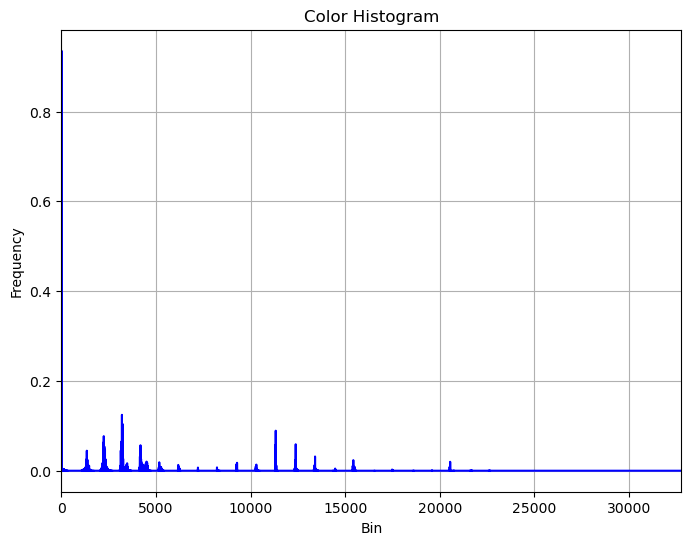

In [53]:
import os

# Directory containing adjusted images
adjusted_images_dir = "AdjustedImages"

def compute_color_histogram(image_name, bins=32, plot=True):

    # Construct full path to the image
    image_path = os.path.join(adjusted_images_dir, image_name)
    
    # Load image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image at", image_path)
        return None
    
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate histogram
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    # Plot histogram
    if plot:
        plt.figure(figsize=(8, 6))
        plt.title("Color Histogram")
        plt.xlabel("Bin")
        plt.ylabel("Frequency")
        plt.plot(hist, color="b")
        plt.xlim([0, bins ** 3])
        plt.grid(True)
        plt.show()
    
    return hist

# List of image filenames in the AdjustedImages folder
image_filenames = os.listdir(adjusted_images_dir)

# Computing color histogram for the first image in the folder
first_image = image_filenames[0]
histogram = compute_color_histogram(first_image, bins=32, plot=True)


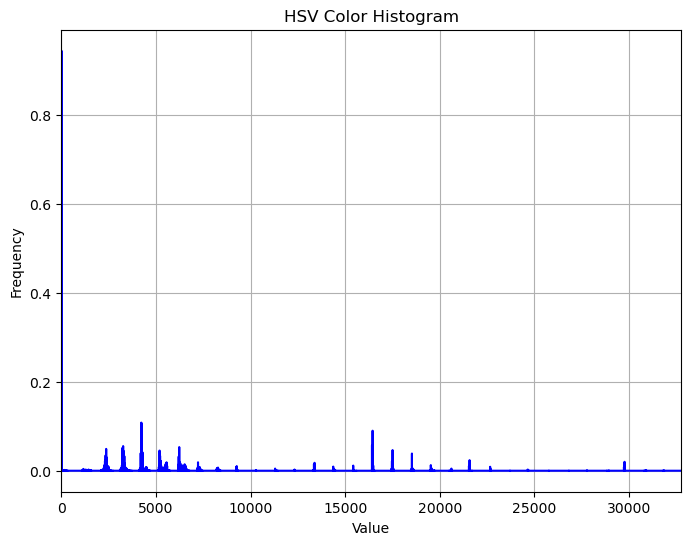

In [57]:
import os

# Directory containing adjusted images
adjusted_images_dir = "AdjustedImages"

def compute_hsv_histogram(image_path, bins=32, plot=True):

    # Load image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image at", image_path)
        return None
    
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate histogram
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [bins, bins, bins], [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    # Plot histogram
    if plot:
        plt.figure(figsize=(8, 6))
        plt.title("HSV Color Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.plot(hist, color="b")
        plt.xlim([0, bins ** 3])
        plt.grid(True)
        plt.show()
    
    return hist

# List of image filenames in the AdjustedImages folder
image_filenames = os.listdir(adjusted_images_dir)

# Computing and plot HSV color histogram for the first image in the folder
first_image_path = os.path.join(adjusted_images_dir, image_filenames[0])
histogram = compute_hsv_histogram(first_image_path, bins=32, plot=True)


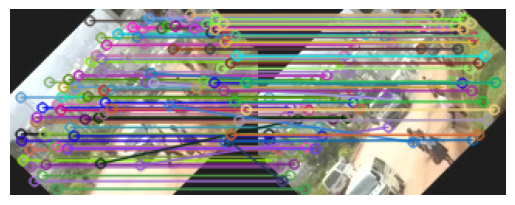

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract color histogram features
def extract_color_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Compute 1D histogram for each channel (Hue, Saturation, Value)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [16], [0, 180]).flatten()
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [16], [0, 256]).flatten()
    hist_value = cv2.calcHist([hsv_image], [2], None, [16], [0, 256]).flatten()
    # Concatenate histograms into a single feature vector
    hist_features = np.concatenate([hist_hue, hist_saturation, hist_value])
    # Normalize feature vector
    hist_features /= np.sum(hist_features)
    return hist_features

# Directory containing adjusted images
folder_path = "AdjustedImages"

# Get paths to input images
image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# Read input images
images = [cv2.imread(image_path) for image_path in image_paths]

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Lists to hold SIFT keypoints and descriptors, and color histogram features
sift_keypoints = []
sift_descriptors = []
hist_features = []

# Loop over images to extract SIFT keypoints and descriptors, and color histogram features
for image in images:
    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sift_keypoints.append(keypoints)
    sift_descriptors.append(descriptors)
    # Extract color histogram features
    hist_features.append(extract_color_histogram(image))

# Initialize FLANN based matcher
flann = cv2.FlannBasedMatcher()

# Match descriptors using FLANN based matcher (example matching)
matches = flann.knnMatch(sift_descriptors[0], sift_descriptors[1], k=2)

# Apply ratio test to find good matches (example matching)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Convert keypoints to list of points
keypoints1 = [keypoint.pt for keypoint in sift_keypoints[0]]
keypoints2 = [keypoint.pt for keypoint in sift_keypoints[1]]

# Draw matches
matched_image = cv2.drawMatches(images[0], sift_keypoints[0], images[1], sift_keypoints[1], good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched image
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now, you can use 'sift_descriptors' and 'hist_features' for further processing or analysis.


In [131]:
import os
import cv2
import numpy as np
import mahotas

# Function to extract color histogram from an image
def extract_color_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate histogram of hue channel
    hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    
    # Normalize histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

# Function to extract texture features from an image
def extract_texture_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate Haralick texture features
    textures = mahotas.features.haralick(gray_image).mean(axis=0)
    
    return textures

# Function to extract edge features from an image
def extract_edge_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)
    
    # Calculate number of edges
    num_edges = np.sum(edges) / 255  # Normalize to get edge density
    
    return num_edges

# Path to the directory containing the images
images_dir = "AdjustedImages"

# Iterate over each image in the directory
for filename in os.listdir(images_dir):
    # Load the image
    image_path = os.path.join(images_dir, filename)
    image = cv2.imread(image_path)
    
    # Extract features from the image
    color_histogram = extract_color_histogram(image)
    texture_features = extract_texture_features(image)
    edge_features = extract_edge_features(image)
    
    # Save the features to files in corresponding directories
    color_histogram_file = os.path.join(color_histograms_dir, f"{filename}_color_histogram.txt")
    texture_features_file = os.path.join(texture_features_dir, f"{filename}_texture_features.txt")
    edge_features_file = os.path.join(edge_features_dir, f"{filename}_edge_features.txt")
    
    np.savetxt(color_histogram_file, color_histogram)
    np.savetxt(texture_features_file, texture_features)
    np.savetxt(edge_features_file, [edge_features])  # Save as 1D array

print("Features extracted and saved successfully.")


Features extracted and saved successfully.


In [123]:
import os
import cv2
import numpy as np
import mahotas

# Function to extract color histogram from an image
def extract_color_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate histogram of hue channel
    hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    
    # Normalize histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

# Function to extract texture features from an image
def extract_texture_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate Haralick texture features
    textures = mahotas.features.haralick(gray_image).mean(axis=0)
    
    return textures

# Function to extract edge features from an image
def extract_edge_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)
    
    # Calculate number of edges
    num_edges = np.sum(edges) / 255  # Normalize to get edge density
    
    return num_edges

# Path to the directory containing the images
images_dir = "AdjustedImages"

# Create folders to store the extracted features
color_histograms_dir = "color_histograms"
texture_features_dir = "texture_features"
edge_features_dir = "edge_features"

os.makedirs(color_histograms_dir, exist_ok=True)
os.makedirs(texture_features_dir, exist_ok=True)
os.makedirs(edge_features_dir, exist_ok=True)

# Iterate over each image in the directory
for filename in os.listdir(images_dir):
    # Load the image
    image_path = os.path.join(images_dir, filename)
    image = cv2.imread(image_path)
    
    # Extract features from the image
    color_histogram = extract_color_histogram(image)
    texture_features = extract_texture_features(image)
    edge_features = extract_edge_features(image)
    
    # Save the features to files
    np.savetxt(os.path.join(color_histograms_dir, f"{filename}_color_histogram.txt"), color_histogram)
    np.savetxt(os.path.join(texture_features_dir, f"{filename}_texture_features.txt"), texture_features)
    np.savetxt(os.path.join(edge_features_dir, f"{filename}_edge_features.txt"), [edge_features])  # Save as 1D array

print("Features extracted and saved successfully.")


Features extracted and saved successfully.


In [48]:
import os

def create_dataset_root(root_folder, classes):
   
    try:
        # Create the root folder if it doesn't exist
        if not os.path.exists(root_folder):
            os.makedirs(root_folder)
        # Create subfolders for each class
        for class_name in classes:
            class_folder = os.path.join(root_folder, class_name)
            if not os.path.exists(class_folder):
                os.makedirs(class_folder)
        print("Dataset root folder and class subfolders created successfully.")
    except Exception as e:
        print("Error creating dataset folders:", e)


root_folder = "dataset"
classes = ["Cars", "Motorcycle"]  
create_dataset_root(root_folder, classes)


Dataset root folder and class subfolders created successfully.


In [ ]:
import os
import cv2
import numpy as np

def extract_color_histogram(image):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Compute the histogram for each channel (Hue, Saturation, Value)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])
    
    # Normalize the histograms
    cv2.normalize(hist_hue, hist_hue, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist_saturation, hist_saturation, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist_value, hist_value, 0, 1, cv2.NORM_MINMAX)
    
    # Concatenate the histograms into a single feature vector
    feature_vector = np.concatenate([hist_hue, hist_saturation, hist_value]).flatten()
    
    return feature_vector

def extract_features_from_folder(folder_path, feature_extractor):
    features = []
    labels = []
    
    class_folders = os.listdir(folder_path)
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            class_label = class_folder
            
            image_files = os.listdir(class_path)
            
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                
                # Load the image
                image = cv2.imread(image_path)
                
                # Extract color histogram features
                extracted_features = feature_extractor(image)
                
                features.append(extracted_features)
                labels.append(class_label) 
                
    return features, labels


In [94]:
def load_features_from_folder(folder_path):
    features = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith("_color_histogram.txt"):
            print("Loading features from file:", filename)
            
            # Load features from file
            feature_file_path = os.path.join(folder_path, filename)
            feature_vector = np.loadtxt(feature_file_path)
            features.append(feature_vector)
            
            # Extract label from filename (assuming "frame_<number>.jpg_color_histogram.txt" format)
            label = filename.split('_')[1]  # Extract the number
            label = label.split('.')[0]     # Remove the file extension
            labels.append(label)
            
            print("Loaded features:", feature_vector)
            print("Extracted label:", label)
    
    return features, labels


# Inspect the loaded features and labels
print("Number of loaded features:", len(features))
print("Number of loaded labels:", len(labels))


Number of loaded features: 29744
Number of loaded labels: 5435095


In [ ]:
import os

# Define the paths to the directories
car_data_path = 'dataset/car_data'
motorcycle_data_path = 'dataset/motorcycle_data'

# Function to count the number of images in a directory
def count_images(directory):
    # List all files in the directory
    files = os.listdir(directory)
    # Count the number of image files (assuming all files are images)
    num_images = len([file for file in files if os.path.isfile(os.path.join(directory, file))])
    return num_images

# Count the number of images in each directory
num_car_images = count_images(car_data_path)
num_motorcycle_images = count_images(motorcycle_data_path)

print(f'Number of car images: {num_car_images}')
print(f'Number of motorcycle images: {num_motorcycle_images}')


In [1]:
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Path to save the datasets
datasets_dir = "documents/workspaces/anaconda/jupyter/eve/datasets"

# Create the datasets directory if it doesn't exist
os.makedirs(datasets_dir, exist_ok=True)

# Paths
annotations_folder = "Annotations"
jpeg_folder = "JPEGImages"
labelmap_path = "labelmap.txt"

# Load label map
with open(labelmap_path, "r") as f:
    label_map = {line.split(":")[0]: idx for idx, line in enumerate(f.readlines()) if line.strip()}

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to extract SIFT features from an image
def extract_sift_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return descriptors

# Lists to hold feature vectors and corresponding labels
feature_vectors = []
labels = []

# Iterate over each XML file in the Annotations folder
for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_folder, xml_file))
        root = tree.getroot()
        
        # Extract image filename
        filename = root.find("filename").text
        image_path = os.path.join(jpeg_folder, filename)
        
        # Extract SIFT features from the image
        descriptors = extract_sift_features(image_path)
        if descriptors is None:
            continue
        
        # Iterate over each object in the XML file to get the label
        for obj in root.findall("object"):
            class_label = obj.find("name").text
            
            # Map class label to an integer index
            label = label_map.get(class_label)
            
            # Append each descriptor as a separate feature vector with the corresponding label
            for descriptor in descriptors:
                feature_vectors.append(descriptor)
                labels.append(label)

# Convert lists to numpy arrays
feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the dataset to disk
train_dir = os.path.join(datasets_dir, 'train_data')
test_dir = os.path.join(datasets_dir, 'test_data')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

np.save(os.path.join(train_dir, "X_train.npy"), X_train)
np.save(os.path.join(train_dir, "y_train.npy"), y_train)
np.save(os.path.join(test_dir, "X_test.npy"), X_test)
np.save(os.path.join(test_dir, "y_test.npy"), y_test)

# Output the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"First few labels: {y_train[:10]}")


Training set shape: (4348076, 128)
Testing set shape: (1087019, 128)
First few labels: [2 2 2 3 2 2 2 3 2 2]


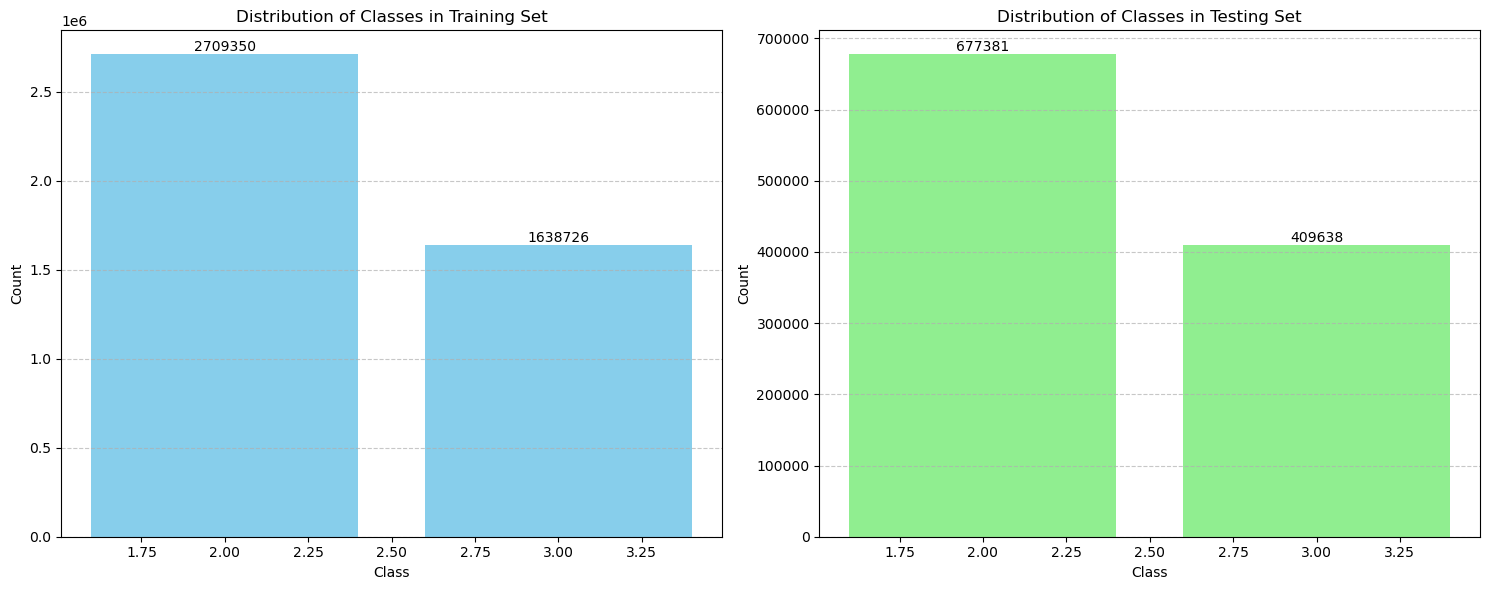

In [25]:
# Count occurrences of each class label in the training set
train_label_counts = {label: np.sum(y_train == label) for label in np.unique(y_train)}

# Count occurrences of each class label in the testing set
test_label_counts = {label: np.sum(y_test == label) for label in np.unique(y_test)}

# Plotting
plt.figure(figsize=(15, 6))

# Plot for training set
plt.subplot(1, 2, 1)
bars_train = plt.bar(train_label_counts.keys(), train_label_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars_train:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

# Plot for testing set
plt.subplot(1, 2, 2)
bars_test = plt.bar(test_label_counts.keys(), test_label_counts.values(), color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Testing Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [9]:
import os
import numpy as np

def extract_features_from_histogram_file(file_path):
    with open(file_path, 'r') as file:
        # Read the content of the file
        content = file.readlines()
        
        # Convert the content to floating-point numbers
        histogram_data = [float(value.strip()) for value in content]
        
        return np.array(histogram_data)

def extract_features_from_directory(directory):
    features = []
    file_names = os.listdir(directory)
    for file_name in file_names:
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):
            features.append(extract_features_from_histogram_file(file_path))
    return np.array(features)

# Directory paths
train_dir = "color_histograms/train"
test_dir = "color_histograms/test"

# Extract features from train and test directories
train_features = extract_features_from_directory(train_dir)
test_features = extract_features_from_directory(test_dir)

# Print the shapes of the extracted features
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Train features shape: (1000, 256)
Test features shape: (248, 256)


In [17]:
import os
import numpy as np

def extract_features_and_labels_from_folder(folder, feature_extractor):
    features = []
    labels = []
    file_names = os.listdir(folder)
    for file_name in file_names:
        file_path = os.path.join(folder, file_name)
        if os.path.isfile(file_path):
            label = file_name.split('_')[1]  # Extract label from file name
            labels.append(label)
            features.append(feature_extractor(file_path))
    return np.array(features), np.array(labels)

def extract_color_histogram(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
        histogram_data = [float(value.strip()) for value in content]
        return np.array(histogram_data)

# Directory paths
train_dir = "color_histograms/train"
test_dir = "color_histograms/test"

# Extract features and labels from train and test directories
train_features, train_labels = extract_features_and_labels_from_folder(train_dir, extract_color_histogram)
test_features, test_labels = extract_features_and_labels_from_folder(test_dir, extract_color_histogram)

# Example of inspecting the extracted features and labels
print("Training features shape:", train_features.shape)
print("Training labels shape:", train_labels.shape)
print("Test features shape:", test_features.shape)
print("Test labels shape:", test_labels.shape)


Training features shape: (1000, 256)
Training labels shape: (1000,)
Test features shape: (248, 256)
Test labels shape: (248,)


In [ ]:
import os
import shutil

def classify_and_move_images(source_folder, destination_folder):
    # Create folders for car and motorcycle data
    car_data_folder = os.path.join(destination_folder, "Car_data")
    motorcycle_data_folder = os.path.join(destination_folder, "Motorcycle_data")
    os.makedirs(car_data_folder, exist_ok=True)
    os.makedirs(motorcycle_data_folder, exist_ok=True)

    # Iterate through images in the source folder
    for filename in os.listdir(source_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(source_folder, filename)
            # Check if the filename contains 'car' or 'motorcycle' and move to respective folders
            if 'car' in filename.lower():
                shutil.copy(image_path, car_data_folder)
            elif 'motorcycle' in filename.lower():
                shutil.copy(image_path, motorcycle_data_folder)

def create_dataset_folder(root_folder, source_folder):
    # Create a folder named 'dataset'
    dataset_folder = os.path.join(root_folder, "dataset")
    os.makedirs(dataset_folder, exist_ok=True)
    # Move the class folders to the dataset folder
    shutil.move(source_folder, dataset_folder)

# Paths
adjusted_images_folder = "AdjustedImages"
root_folder = "."  # Change this to the desired root folder

# Classify and move images into separate folders
classify_and_move_images(adjusted_images_folder, root_folder)

# Create 'dataset' folder and move class folders into it
create_dataset_folder(root_folder, "Car_data")
create_dataset_folder(root_folder, "Motorcycle_data")

print("Images classified and stored in 'Car_data' and 'Motorcycle_data' folders.")
print("Folders moved to 'dataset' folder.")


In [73]:
import os
import shutil
import xml.etree.ElementTree as ET

def read_label_map(label_map_file):
   
    label_map = {}
    with open(label_map_file, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            parts = line.strip().split(':')
            if len(parts) >= 2:
                label = parts[0]
                filename = parts[1].split(',')[0]
                label_map[filename] = label
            else:
                print(f"Ignoring invalid line: {line}")
    return label_map

def parse_xml_annotations(annotations_folder):
   
    label_map = {}
    for filename in os.listdir(annotations_folder):
        if filename.endswith('.xml'):
            xml_file = os.path.join(annotations_folder, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()
            # Assuming each XML file contains only one object annotation
            for obj in root.findall('object'):
                label = obj.find('name').text
                label_map[filename[:-4] + '.jpg'] = label
    return label_map

def classify_and_move_images(source_folder, destination_folder, label_map):
    car_data_folder = os.path.join(destination_folder, "Car_data")
    motorcycle_data_folder = os.path.join(destination_folder, "Motorcycle_data")
    os.makedirs(car_data_folder, exist_ok=True)
    os.makedirs(motorcycle_data_folder, exist_ok=True)

    for filename, label in label_map.items():
        image_path = os.path.join(source_folder, filename)
        if os.path.exists(image_path):
            if label.lower() == 'car':
                shutil.copy(image_path, car_data_folder)
                print(f"Moved '{filename}' to 'Car_data' folder.")
            elif label.lower() == 'motorcycle':
                shutil.copy(image_path, motorcycle_data_folder)
                print(f"Moved '{filename}' to 'Motorcycle_data' folder.")
            else:
                print(f"Unknown label '{label}' for '{filename}'. Skipping.")
        else:
            print(f"Image '{filename}' not found. Skipping.")

def create_dataset_folder(root_folder):
    dataset_folder = os.path.join(root_folder, "dataset")
    os.makedirs(dataset_folder, exist_ok=True)
    shutil.move(os.path.join(root_folder, "Car_data"), dataset_folder)
    shutil.move(os.path.join(root_folder, "Motorcycle_data"), dataset_folder)
    print("Folders moved to 'dataset' folder.")

# Paths
adjusted_images_folder = "AdjustedImages"
annotations_folder = "Annotations"
label_map_file = "labelmap.txt"
root_folder = "."  

# Read label map from XML annotations
label_map_from_xml = parse_xml_annotations(annotations_folder)

# Read label map from text file
label_map_from_file = read_label_map(label_map_file)

# Combine label maps (if needed)
label_map_combined = {**label_map_from_xml, **label_map_from_file}

# Classify and move images into separate folders
classify_and_move_images(adjusted_images_folder, root_folder, label_map_combined)

# Create 'dataset' folder and move class folders into it
create_dataset_folder(root_folder)


Moved 'frame_00000.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00001.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00002.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00003.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00004.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00005.jpg' to 'Car_data' folder.
Moved 'frame_00006.jpg' to 'Car_data' folder.
Moved 'frame_00007.jpg' to 'Car_data' folder.
Moved 'frame_00008.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00009.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00010.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00011.jpg' to 'Car_data' folder.
Moved 'frame_00012.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00013.jpg' to 'Motorcycle_data' folder.
Moved 'frame_00014.jpg' to 'Car_data' folder.
Moved 'frame_00015.jpg' to 'Car_data' folder.
Moved 'frame_00016.jpg' to 'Car_data' folder.
Moved 'frame_00017.jpg' to 'Car_data' folder.
Moved 'frame_00018.jpg' to 'Car_data' folder.
Moved 'frame_00019.jpg' to 'Car_data' folder.
Moved 'fra

Error: Destination path '.\dataset\Car_data' already exists

Car Samples:


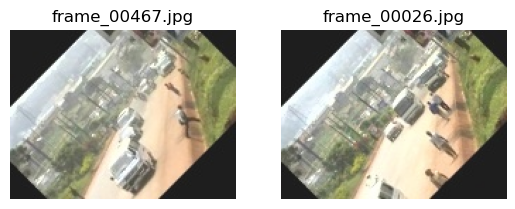

Motorcycle Samples:


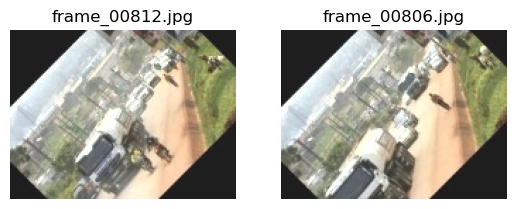

In [75]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def display_samples(folder, num_samples=2):
    # Get list of image filenames in the folder
    image_files = [filename for filename in os.listdir(folder) if filename.endswith(('.jpg', '.png', '.jpeg'))]
    # Randomly select two images
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))
    # Display each sample image
    for i, filename in enumerate(sample_images, 1):
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(filename)
    plt.show()

# Paths to class folders
car_data_folder = "Car_data"
motorcycle_data_folder = "Motorcycle_data"

# Display two samples from each class
print("Car Samples:")
display_samples(car_data_folder, num_samples=2)

print("Motorcycle Samples:")
display_samples(motorcycle_data_folder, num_samples=2)


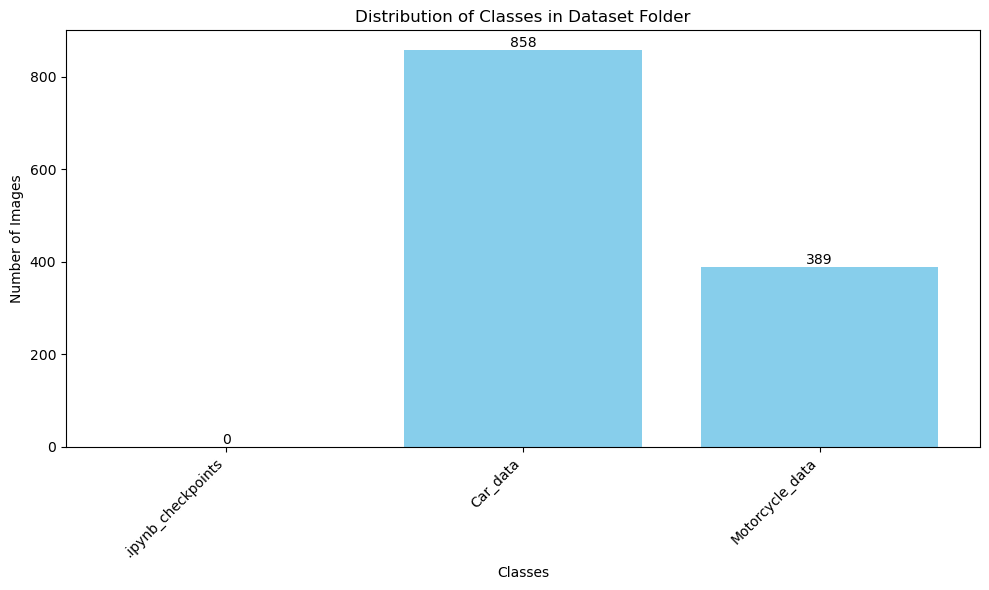

In [152]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset folder
dataset_folder = "dataset"

# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset folder and count the number of images in each class folder
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    if os.path.isdir(class_path):
        class_counts[class_folder] = len(os.listdir(class_path))

# Plot the distribution as a bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Dataset Folder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil

def classify_and_move_images(source_folder, destination_folder):
    # Create folders for car and motorcycle data
    car_data_folder = os.path.join(destination_folder, "Car_data")
    motorcycle_data_folder = os.path.join(destination_folder, "Motorcycle_data")
    os.makedirs(car_data_folder, exist_ok=True)
    os.makedirs(motorcycle_data_folder, exist_ok=True)

    # Iterate through images in the source folder
    for filename in os.listdir(source_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(source_folder, filename)
            # Check if the filename contains 'car' or 'motorcycle' and move to respective folders
            if 'car' in filename.lower():
                shutil.copy(image_path, car_data_folder)
            elif 'motorcycle' in filename.lower():
                shutil.copy(image_path, motorcycle_data_folder)

def create_dataset_folder(root_folder, source_folder):
    # Create a folder named 'dataset'
    dataset_folder = os.path.join(root_folder, "dataset")
    os.makedirs(dataset_folder, exist_ok=True)
    # Move the class folders to the dataset folder
    shutil.move(source_folder, dataset_folder)

# Paths
adjusted_images_folder = "AdjustedImages"
root_folder = "."  # Change this to the desired root folder

# Classify and move images into separate folders
classify_and_move_images(adjusted_images_folder, root_folder)

# Create 'dataset' folder and move class folders into it
create_dataset_folder(root_folder, "Car_data")
create_dataset_folder(root_folder, "Motorcycle_data")

print("Images classified and stored in 'Car_data' and 'Motorcycle_data' folders.")
print("Folders moved to 'dataset' folder.")


In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Function to extract color histogram features
def extract_color_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Compute 1D histogram for each channel (Hue, Saturation, Value)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [16], [0, 180]).flatten()
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [16], [0, 256]).flatten()
    hist_value = cv2.calcHist([hsv_image], [2], None, [16], [0, 256]).flatten()
    # Concatenate histograms into a single feature vector
    hist_features = np.concatenate([hist_hue, hist_saturation, hist_value])
    # Normalize feature vector
    hist_features /= np.sum(hist_features)
    return hist_features

# Function to extract SIFT descriptors
def extract_sift_descriptors(image):
    # Initialize SIFT detector
    sift = cv2.SIFT_create()
    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return descriptors

# Function to extract features (SIFT descriptors and color histogram features) from an image
def extract_features(image_path):
    # Read image
    image = cv2.imread(image_path)
    # Extract SIFT descriptors
    sift_descriptors = extract_sift_descriptors(image)
    if sift_descriptors is None:
        sift_descriptors = np.zeros((1, 128))  # Placeholder for empty descriptors
    else:
        sift_descriptors = sift_descriptors[:100, :]  # Limit number of descriptors to 100
    # Extract color histogram features
    color_hist_features = extract_color_histogram(image)
    return sift_descriptors, color_hist_features

# Directory containing images for both classes
car_data_folder = "dataset/Car_data"
motorcycle_data_folder = "dataset/Motorcycle_data"

# Lists to store features and labels
X_sift = []  # SIFT descriptors
X_color_hist = []  # Color histogram features
y = []  # Labels

# Process Car_data dataset
for filename in os.listdir(car_data_folder):
    image_path = os.path.join(car_data_folder, filename)
    # Extract features from the image
    sift_descriptors, color_hist_features = extract_features(image_path)
    # Append features and corresponding label to the lists
    X_sift.append(sift_descriptors)
    X_color_hist.append(color_hist_features)
    y.append("Car")

# Process Motorcycle_data dataset
for filename in os.listdir(motorcycle_data_folder):
    image_path = os.path.join(motorcycle_data_folder, filename)
    # Extract features from the image
    sift_descriptors, color_hist_features = extract_features(image_path)
    # Append features and corresponding label to the lists
    X_sift.append(sift_descriptors)
    X_color_hist.append(color_hist_features)
    y.append("Motorcycle")

# Convert lists to NumPy arrays
X_sift = np.array(X_sift)
X_color_hist = np.array(X_color_hist)
y = np.array(y)

# Print the shapes of the arrays
print("SIFT descriptors shape:", X_sift.shape)
print("Color histogram features shape:", X_color_hist.shape)
print("Labels shape:", y.shape)


SIFT descriptors shape: (1247, 100, 128)
Color histogram features shape: (1247, 48)
Labels shape: (1247,)


In [146]:
# Split the dataset into training and testing sets for SIFT descriptors
X_sift_train, X_sift_test, y_train, y_test = train_test_split(X_sift, y, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for color histogram features
X_color_hist_train, X_color_hist_test, y_train, y_test = train_test_split(X_color_hist, y, test_size=0.2, random_state=42)

# Print the shapes of the arrays for training and testing sets
print("SIFT descriptors training set shape:", X_sift_train.shape)
print("SIFT descriptors testing set shape:", X_sift_test.shape)
print("Color histogram features training set shape:", X_color_hist_train.shape)
print("Color histogram features testing set shape:", X_color_hist_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


SIFT descriptors training set shape: (997, 100, 128)
SIFT descriptors testing set shape: (250, 100, 128)
Color histogram features training set shape: (997, 48)
Color histogram features testing set shape: (250, 48)
Training labels shape: (997,)
Testing labels shape: (250,)


In [148]:
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

# Define models
models = {
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Add the hybrid model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(random_state=42)

hybrid_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('knn', knn_model),
    ('logistic_regression', lr_model)
], voting='soft')  # Soft voting for probability predictions

models["Hybrid Model"] = hybrid_model

# Train and evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    # Train the model
    model.fit(X_sift_train.reshape((X_sift_train.shape[0], -1)), y_train)  # Flatten SIFT descriptors
    # Predict
    y_pred = model.predict(X_sift_test.reshape((X_sift_test.shape[0], -1)))  # Flatten SIFT descriptors
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_sift_test.reshape((X_sift_test.shape[0], -1)))[:, 1])
    # Print evaluation metrics
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}")
    print(f"{model_name} F1 Score: {f1:.4f}")
    print(f"{model_name} AUC: {auc}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


Evaluating Support Vector Machine...
Support Vector Machine Accuracy: 0.5640
Support Vector Machine Precision: 0.5655
Support Vector Machine Recall: 0.5640
Support Vector Machine F1 Score: 0.5647
Support Vector Machine AUC: 0.48056850988230065
Confusion Matrix:
 [[116  55]
 [ 54  25]]
              precision    recall  f1-score   support

         Car       0.68      0.68      0.68       171
  Motorcycle       0.31      0.32      0.31        79

    accuracy                           0.56       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.57      0.56      0.56       250



Evaluating Random Forest...
Random Forest Accuracy: 0.6840
Random Forest Precision: 0.4679
Random Forest Recall: 0.6840
Random Forest F1 Score: 0.5556
Random Forest AUC: 0.510622547931009
Confusion Matrix:
 [[171   0]
 [ 79   0]]
              precision    recall  f1-score   support

         Car       0.68      1.00      0.81       171
  Motorcycle       0.00      0.00      0.00   

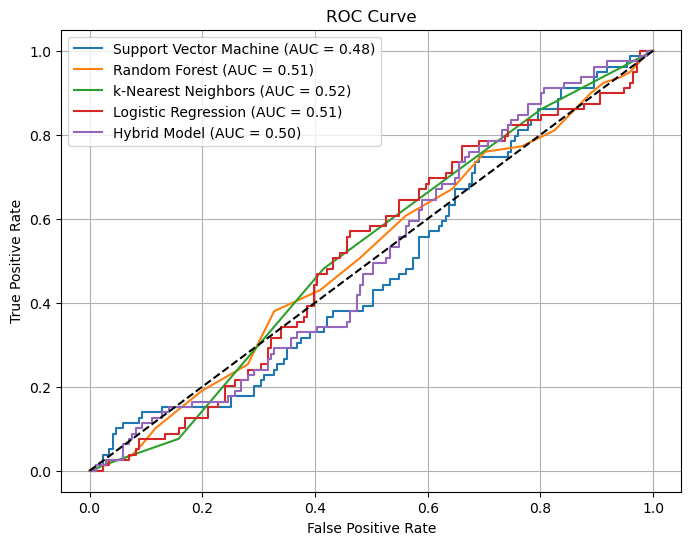

In [112]:
from sklearn.metrics import roc_curve, auc as sklearn_auc

# Train the hybrid model
hybrid_model.fit(X_sift_train.reshape((X_sift_train.shape[0], -1)), y_train)

# Predict probabilities for the hybrid model
hybrid_y_prob = hybrid_model.predict_proba(X_sift_test.reshape((X_sift_test.shape[0], -1)))[:, 1]

# Calculate ROC curve and AUC for the hybrid model
hybrid_fpr, hybrid_tpr, _ = roc_curve(y_test_bin, hybrid_y_prob)
hybrid_auc = sklearn_auc(hybrid_fpr, hybrid_tpr)

# Plot ROC curves for all models including the hybrid model
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Predict probabilities
    if model_name == "Hybrid Model":
        # Use probabilities obtained from the hybrid model
        y_prob = hybrid_y_prob
        fpr, tpr = hybrid_fpr, hybrid_tpr
        auc_value = hybrid_auc
    else:
        y_prob = model.predict_proba(X_sift_test.reshape((X_sift_test.shape[0], -1)))[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
        auc_value = sklearn_auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

# Plot ROC curve for random guessing (dashed diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Suppress warnings
warnings.filterwarnings("ignore")

# Define PCA parameters
n_components = 45  # Adjust as needed

# Initialize PCA for SIFT descriptors
pca_sift = PCA(n_components=n_components)

# Apply PCA to SIFT descriptors
X_sift_train_pca = pca_sift.fit_transform(X_sift_train.reshape((X_sift_train.shape[0], -1)))
X_sift_test_pca = pca_sift.transform(X_sift_test.reshape((X_sift_test.shape[0], -1)))

# Initialize PCA for color histogram features
pca_color_hist = PCA(n_components=n_components)

# Apply PCA to color histogram features
X_color_hist_train_pca = pca_color_hist.fit_transform(X_color_hist_train)
X_color_hist_test_pca = pca_color_hist.transform(X_color_hist_test)

# Combine PCA-reduced features
X_train_pca = np.concatenate((X_sift_train_pca, X_color_hist_train_pca), axis=1)
X_test_pca = np.concatenate((X_sift_test_pca, X_color_hist_test_pca), axis=1)

# Define models
models = {
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Add the hybrid model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(random_state=42)

hybrid_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('knn', knn_model),
    ('logistic_regression', lr_model)
], voting='soft')  # Soft voting for probability predictions

models["Hybrid Model"] = hybrid_model

# Train and evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    # Train the model
    model.fit(X_train_pca, y_train)
    # Predict
    y_pred = model.predict(X_test_pca)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1])
    # Print evaluation metrics
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}")
    print(f"{model_name} F1 Score: {f1:.4f}")
    print(f"{model_name} AUC: {auc}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")
